In [339]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
df=pd.read_csv('country_wise_latest.csv')
df=df[['Country/Region', 'Deaths', 'Active', 'New cases']]
df=df.set_index('Country/Region')
df


,Deaths,Active,New cases
Country/Region,,,
Afghanistan,1269,9796,106
Albania,144,1991,117
Algeria,1163,7973,616
Andorra,52,52,10
Angola,41,667,18
...,...,...,...
West Bank and Gaza,78,6791,152
Western Sahara,1,1,0
Yemen,483,375,10


In [340]:
country_map = df.to_dict(orient='index')

In [341]:
country_map['Afghanistan']

{'Deaths': 1269, 'Active': 9796, 'New cases': 106}

In [342]:
df.sum(axis=0).sort_values().tail(10)

New cases     228693
Deaths        654036
Active       6358362
dtype: int64

In [343]:
matrix_dense=df.to_numpy()


In [344]:
svd = TruncatedSVD(n_components=3)

In [345]:
svd.fit(matrix_dense)

TruncatedSVD(n_components=3)

In [346]:
matrix_reduced = svd.transform(matrix_dense)

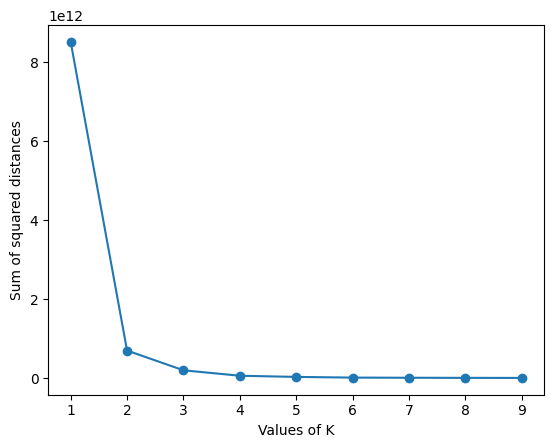

In [347]:
elbow = dict()
range_of_k = range(1,10) 
for k in range_of_k :
 untrained_model = KMeans(n_clusters=k)
 trained_model=untrained_model.fit(df)
 elbow[k]=trained_model.inertia_
 
plt.plot(elbow.keys(),elbow.values())
plt.scatter(elbow.keys(),elbow.values())
plt.xlabel("Values of K") 
plt.ylabel("Sum of squared distances") 
plt.show()


In [348]:
k = 4

model = KMeans(n_clusters=k)

In [349]:
model.fit(matrix_reduced)

KMeans(n_clusters=4)

In [350]:
df["cluster"] = model.labels_

In [351]:
df[["cluster"]]

,cluster
Country/Region,
Afghanistan,0
Albania,0
Algeria,0
Andorra,0
Angola,0
...,...
West Bank and Gaza,0
Western Sahara,0
Yemen,0


In [352]:
df["cluster"].value_counts()

cluster
0    173
3     11
2      2
1      1
Name: count, dtype: int64

In [353]:
for cluster_label, cluster_data in df.groupby("cluster"):
    cluster_size = len(cluster_data)
    if cluster_size < 10:
        sample_size = cluster_size
    else:
        sample_size = 10
    print(f"Cluster {cluster_label} (size {cluster_size}):")
    print(cluster_data.sample(sample_size))
    

Cluster 0 (size 173):
                Deaths  Active  New cases  cluster
Country/Region                                    
Greece             202    2651         34        0
Uruguay             35     216         10        0
Kosovo             185    3201        496        0
Malawi              99    1920         24        0
El Salvador        408    6849        405        0
Saudi Arabia      2760   43238       1993        0
Benin               35     699          0        0
Croatia            139     806         24        0
Lesotho             12     365          0        0
Bolivia           2647   47056       1752        0
Cluster 1 (size 1):
                Deaths   Active  New cases  cluster
Country/Region                                     
US              148011  2816444      56336        1
Cluster 2 (size 2):
                Deaths  Active  New cases  cluster
Country/Region                                    
India            33408  495499      44457        2
Brazil           

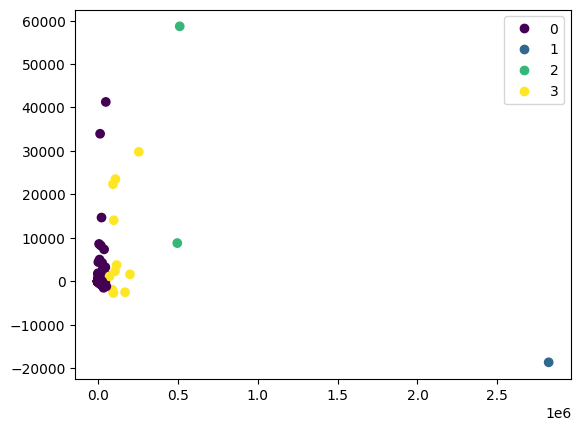

In [354]:
scatter=plt.scatter(matrix_reduced[:, 0], matrix_reduced[:, 1], c=model.labels_)
x,y=scatter.legend_elements()
legend= plt.legend(x,y)
plt.show()

